# Lecture 9: Functions #

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Example

In [2]:
# From https://womenintheworld.org/highest-paid-actress/
incomes = Table.read_table('2022_female_actors.csv')
incomes.show(3)

Name,Income (millions)
Scarlett Johansson,56
Sofia Vergara,43
Angelina Jolie,35.5


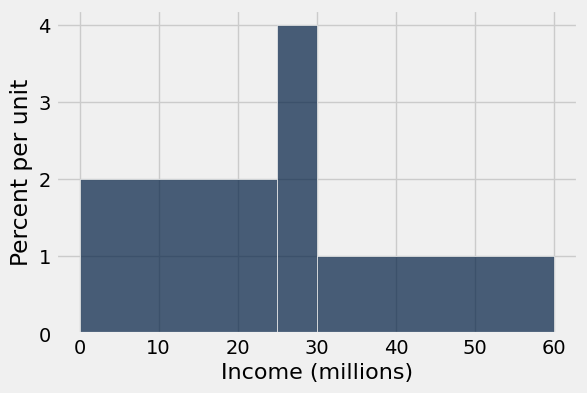

In [3]:
my_bins = make_array(0, 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins)

In [4]:
min(incomes.column(1))

12.5

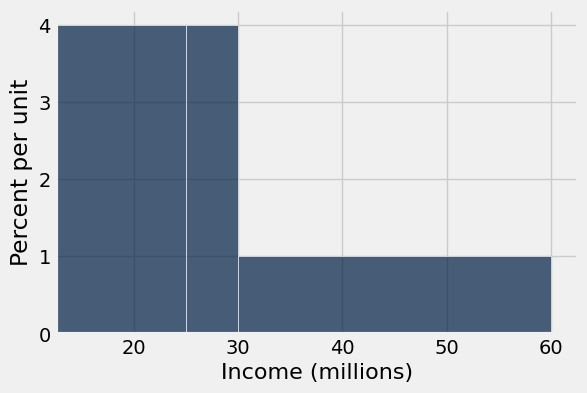

In [5]:
my_bins = make_array(min(incomes.column(1)), 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins)
plots.xlim(12.5,62.6);

## Defining Functions ##  

Example: Create a function that takes a numerical input and triples it: $\textsf{triple}(x)=3\,x$

In [6]:
def triple(anything):
    return 3 * anything

In [7]:
triple(3)

9

In [9]:
num = 4

In [10]:
triple(num)

12

In [11]:
triple(num * 5)

60

## The Anatomy of a Function ##  
    
```python
def function_name(arguments):
    ...
    return return_expression
```

## Functions are Type-Agnostic  ## 

In [12]:
triple('ha')

'hahaha'

In [14]:
np.arange(4) * 3

array([0, 3, 6, 9])

In [15]:
triple(np.arange(4))

array([0, 3, 6, 9])

## Discussion
- What does the following function do?
- What type of input does it take?
- What type of output does it produce?
- What's a good name for the function?

```python
def f(s):     
      return np.round(s / sum(s) * 100, 2)
```

In [16]:
def percent_of_total(s):
    """Takes an array and computes the percent of total for each element in array."""
    return np.round(s / sum(s) * 100, 2)

In [17]:
percent_of_total?

In [18]:
first_four=make_array(1,2,3,4)
first_four

array([1, 2, 3, 4])

In [19]:
percent_of_total(first_four)

array([ 10.,  20.,  30.,  40.])

In [20]:
percent_of_total(make_array(1, 213, 38))

array([  0.4 ,  84.52,  15.08])

### Functions Can Take Multiple Arguments ###

Example: Calculate the Hypotenuse Length of a Right Triangle


Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [21]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [22]:
hypotenuse(1,2)

2.23606797749979

In [23]:
hypotenuse(3,4)

5.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [24]:
def hypotenuse(x,y):
    return (x ** 2 + y ** 2)**0.5

In [25]:
hypotenuse(9, 12)

15.0

### Example: A function that takes the year of birth of a person and produces their age in years. ###

In [26]:
def age(year):
    current_year = 2024 # update for new years
    age = current_year - year
    return age

In [27]:
age(1974)

50

Now add some bells and whistles:  Take person's name and year of birth (two arguments). Produce a sentence that states how old they are.

In [28]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [29]:
name_and_age('Joe',1942)

'Joe is 82 years old.'

## Apply ##

In [30]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [32]:
ages.apply(age,'Birth Year')

array([ 39,  36,  57, 120])

In [35]:
ages.apply(name_and_age,'Person','Birth Year')

array(['Jim is 39 years old.', 'Pam is 36 years old.',
       'Michael is 57 years old.', 'Creed is 120 years old.'],
      dtype='<U24')